In [ ]:
# PROBLEM STATEMENT AND BUSINESS CASE
# 
# In this project we will predict the sale prices of homes in KingCounty, USA, between May 2014 and May 2015
# 
# By using deep learning techniques and several relevant features such as the number of bedrooms, bathrooms,
# view, and square footage, this project aims to develop a predictive model that can accurately estimate home prices in King County.
# Such a model can be used by real estate agents, buyers, and sellers to make more informed decisions about home pricing, purchase, and sale.

# # IMPORT LIBRARIES AND DATASETS


# New Section

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=True) 



In [94]:
df = pd.read_csv('realestate_prices.csv', encoding = 'ISO-8859-1')


In [95]:
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [96]:
df.shape


(21613, 21)

In [97]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

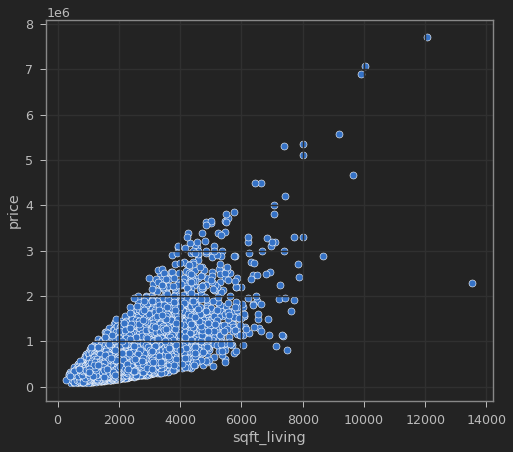

In [98]:
sns.scatterplot(x='sqft_living',y='price',data=df)


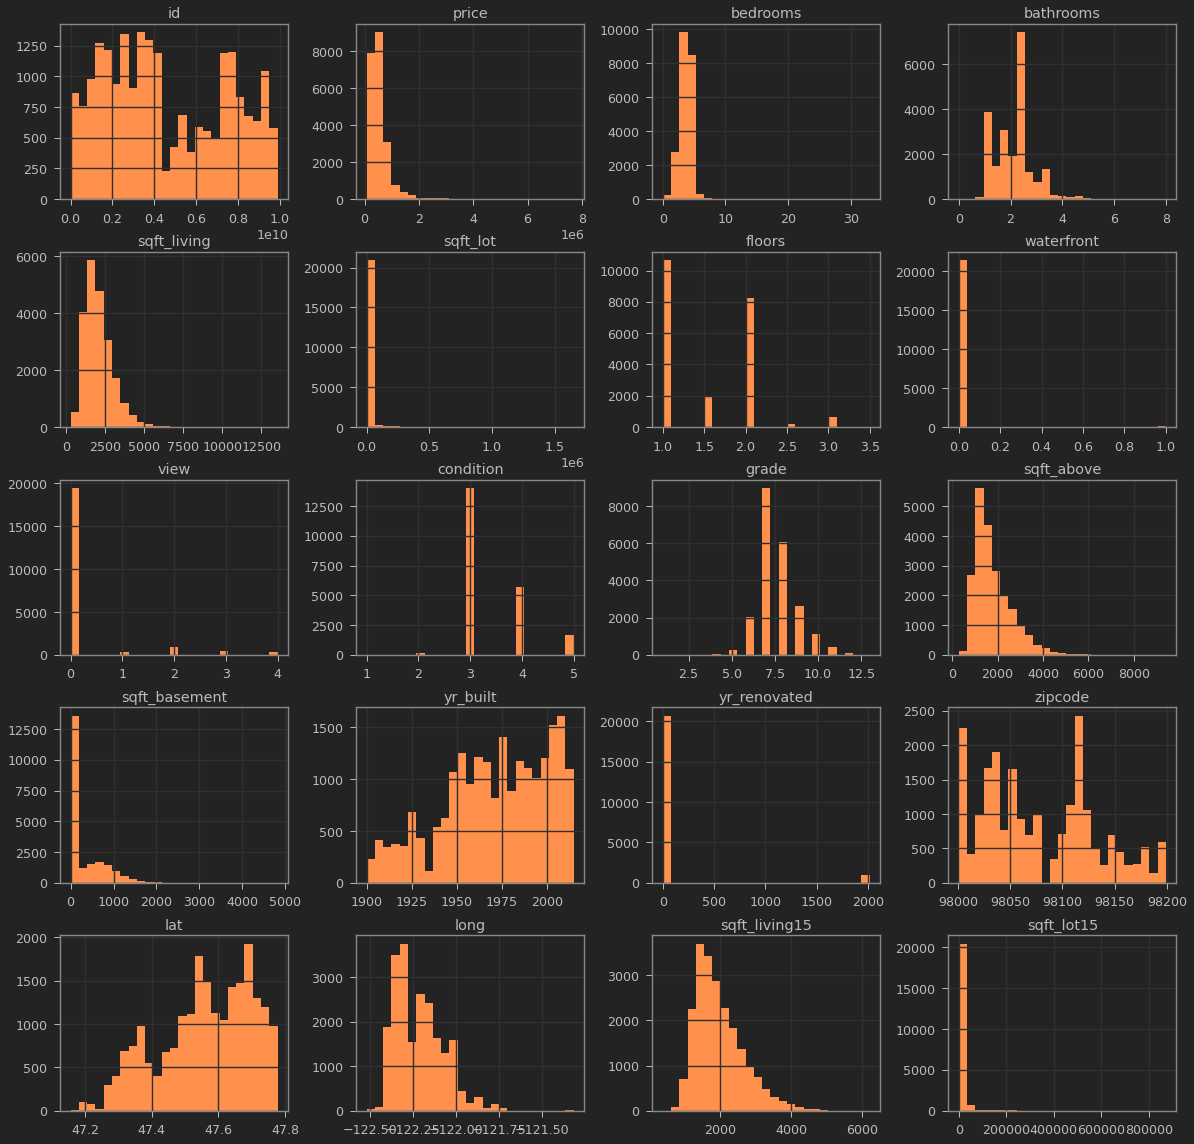

In [99]:
df.hist(bins = 25, figsize = (20,20), color = 'y');


In [100]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

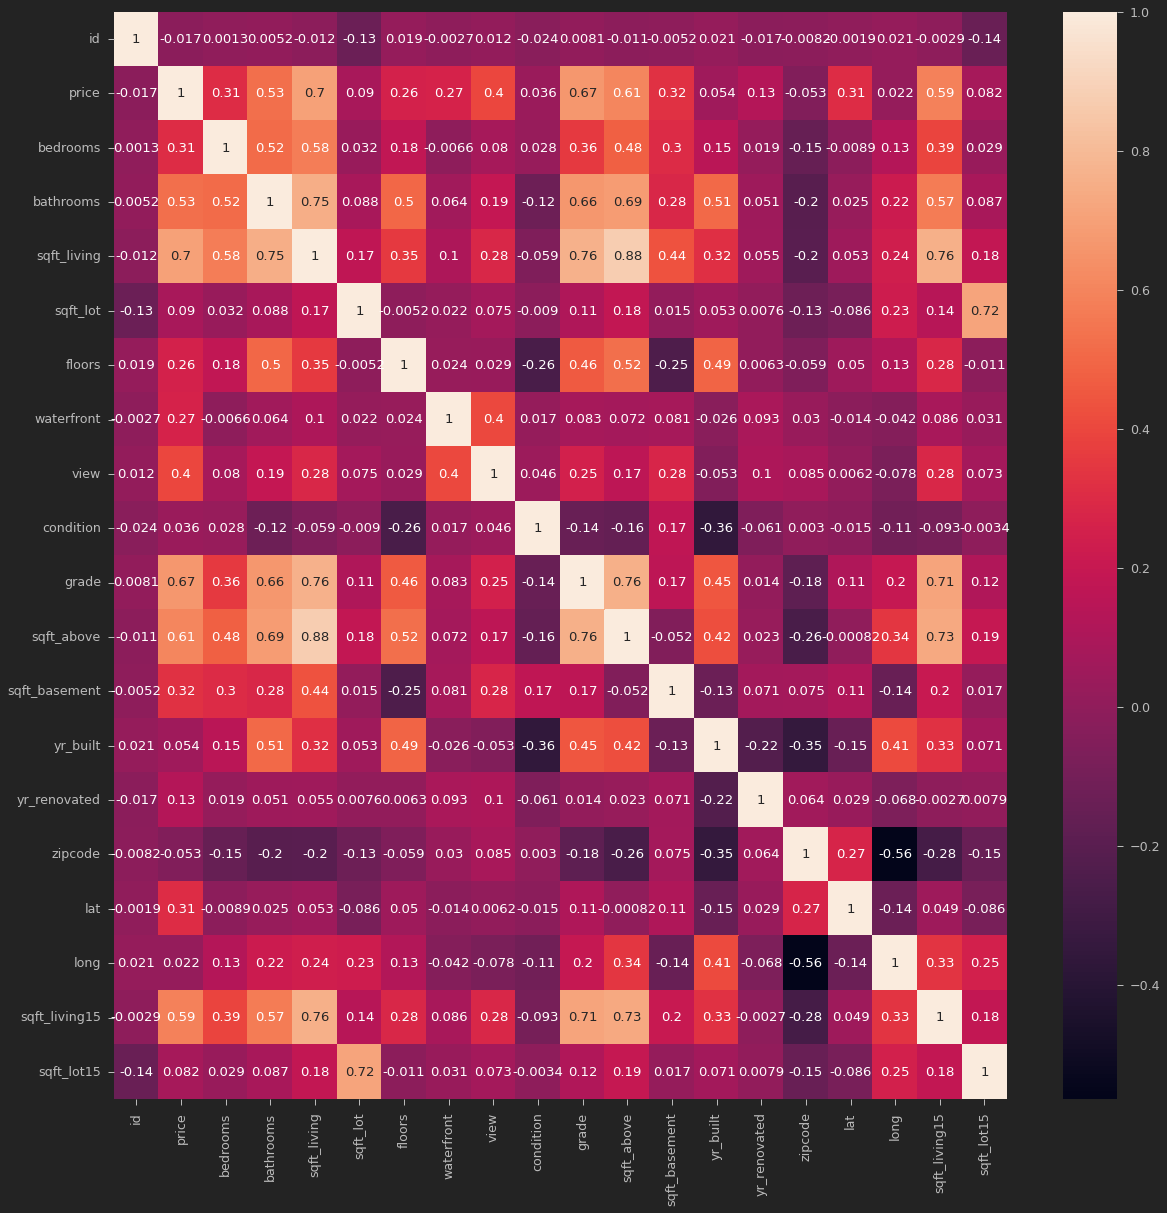

In [101]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True)



In [102]:
df_sample = df[ ['price', 'bedrooms', 'bathrooms',
'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built']   ]


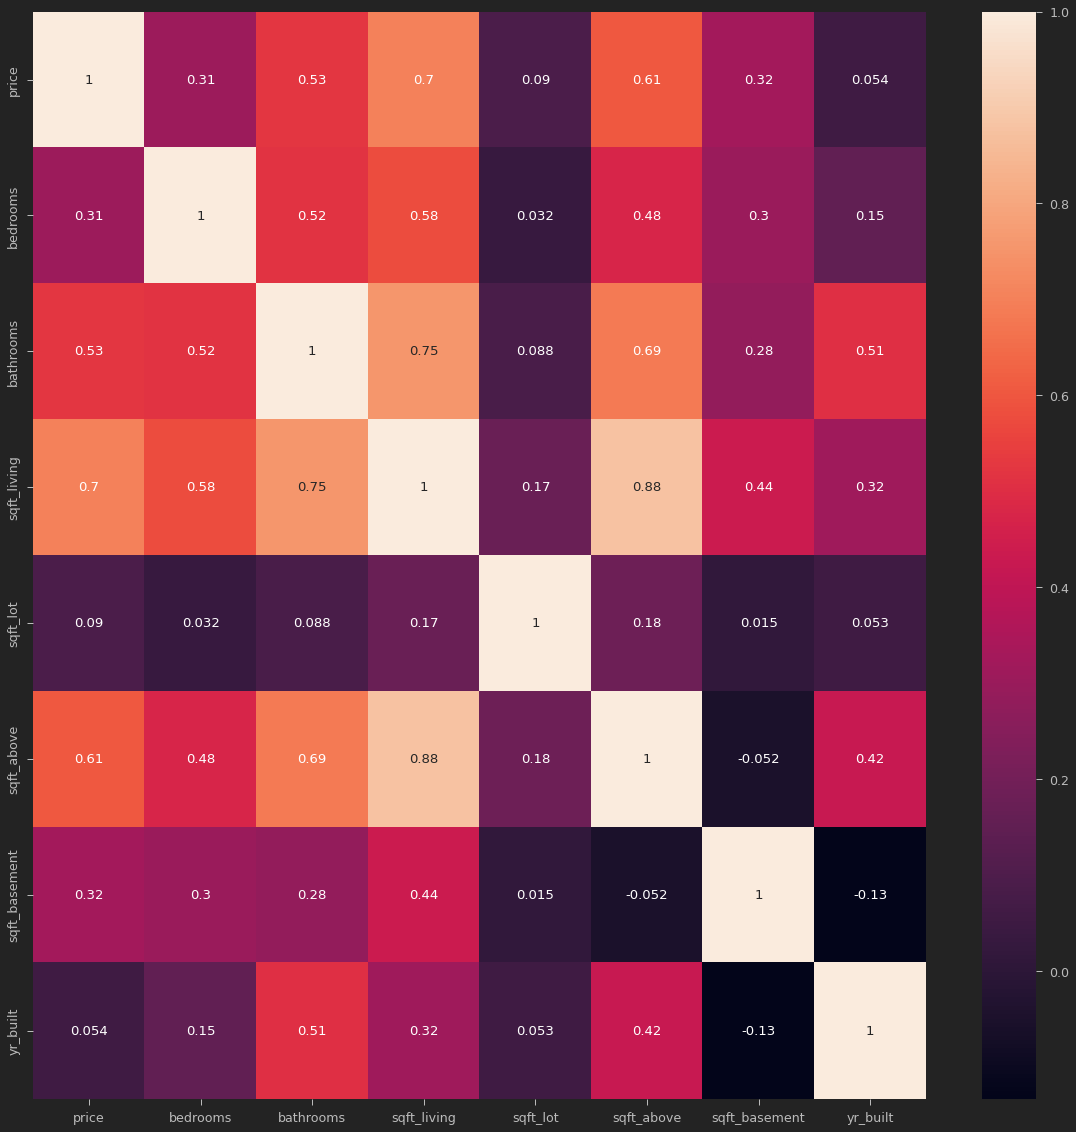

In [103]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(df_sample.corr(), annot = True)

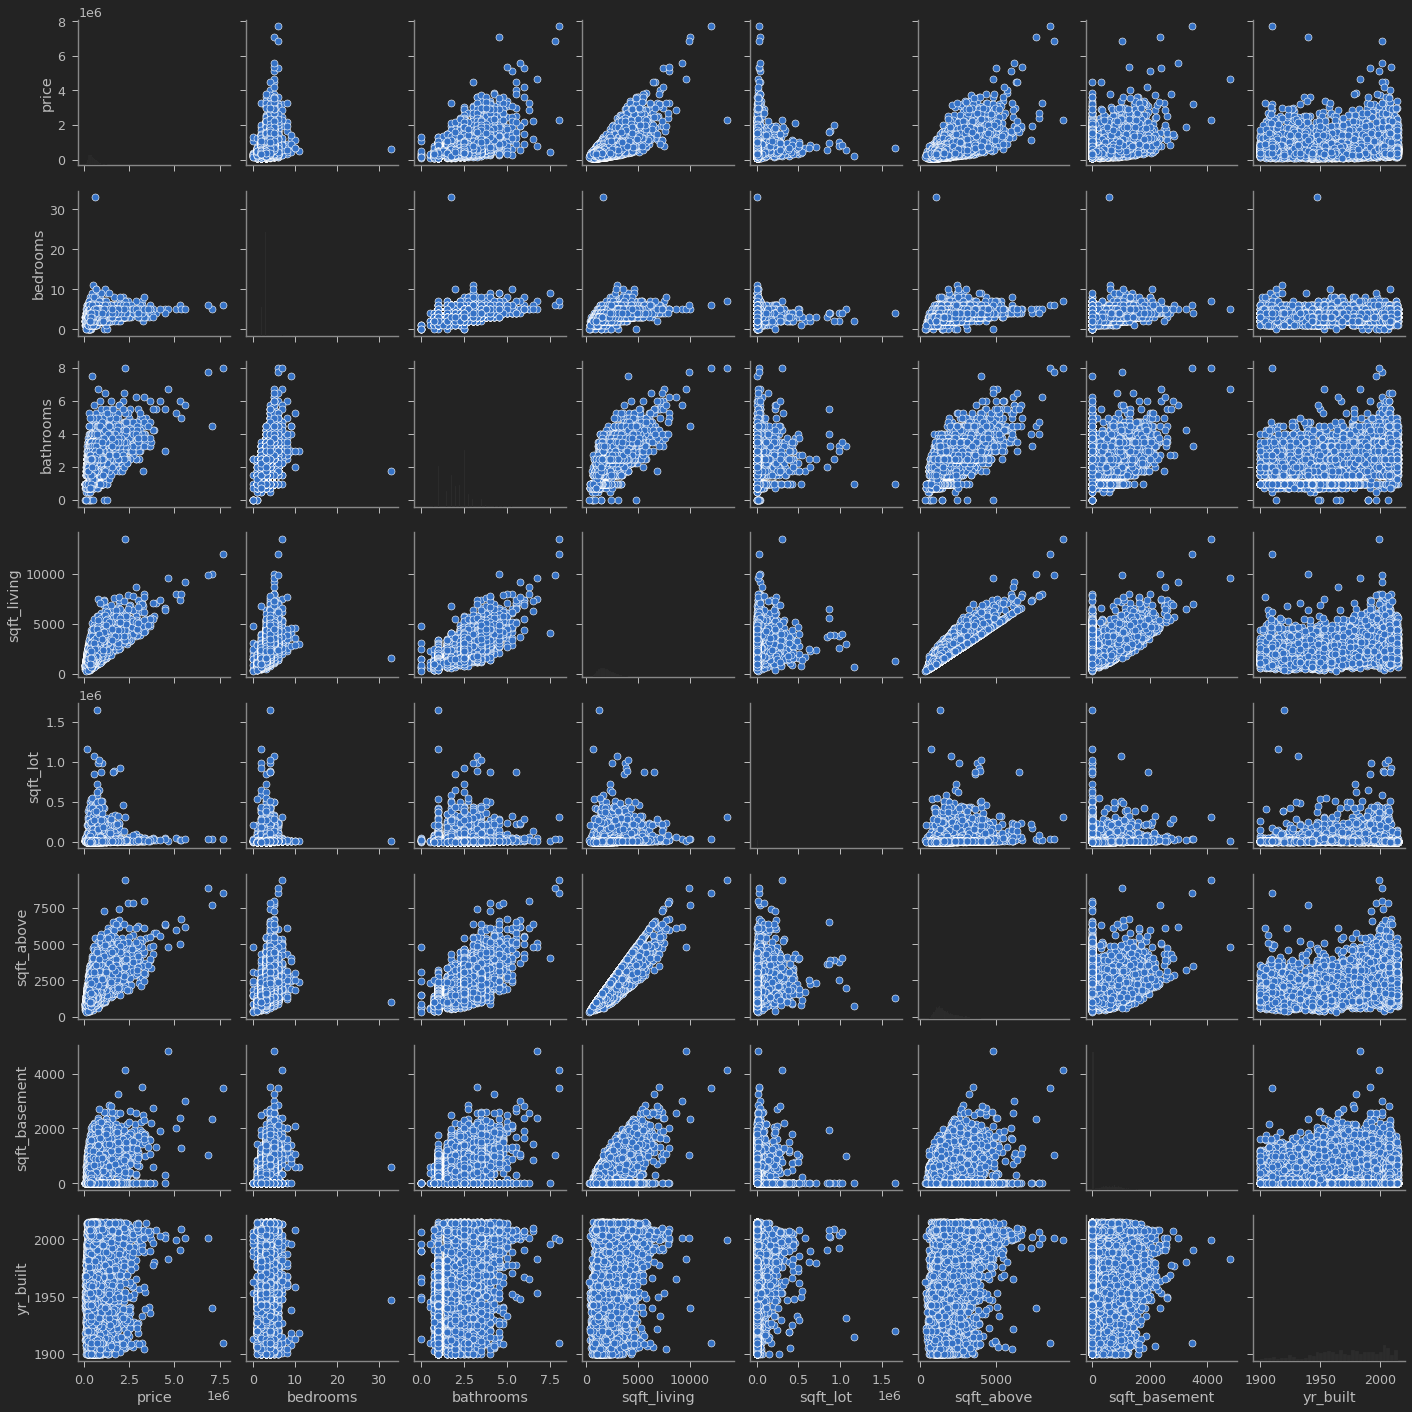

In [92]:
# different combination of features to see correlation between them

sns.pairplot(df_sample) 
plt.show()

In [33]:
# # PERFORM DATA CLEANING AND FEATURE ENGINEERING
selected_features = ['bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']



In [40]:
X = df[selected_features]


In [41]:
X.shape


(21613, 7)

In [42]:
y = df['price']


In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [44]:
y = y.values.reshape(-1,1)


In [45]:
y_scaled = scaler.fit_transform(y)


In [17]:
y_scaled = scaler.fit_transform(y)


In [46]:
# # TRAIN A DEEP LEARNING MODEL WITH LIMITED NUMBER OF FEATURES




## once the model is trained(using train_set) we freeze those weights between the neurons
# and access the performance of network on completey new data set that model has not seen(test_set)
# this is the idea we make sure that thiss deep neural network  are able 
# to generalize not memorize the traning data


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                            y_scaled, test_size = 0.25)





In [19]:
import tensorflow.keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(100, input_dim = 7, activation = 'relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation = 'linear'))


In [20]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               800       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 21,101
Trainable params: 21,101
Non-trainable params: 0
_________________________________________________________________


In [22]:
from tensorflow.keras.optimizers.legacy import Adam


In [23]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')


In [24]:
epochs_hist = model.fit(X_train, y_train, epochs = 100,
                        batch_size = 50, validation_split = 0.2)



Epoch 1/100
260/260 [==============================] - 2s 3ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 2/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 3/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 4/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 5/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 6/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 7/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 8/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 9/100
260/260 [==============================] - 1s 4ms/step - loss: 0.0010 - val_loss: 9.9968e-04
Epoch 10/100
260/260 [==============================] - 1s 4ms/step - loss: 0.0010 - va

In [47]:
# EVALUATE TRAINED DEEP LEARNING MODEL PERFORMANCE 


In [49]:
epochs_hist.history.keys()


dict_keys(['loss', 'val_loss'])

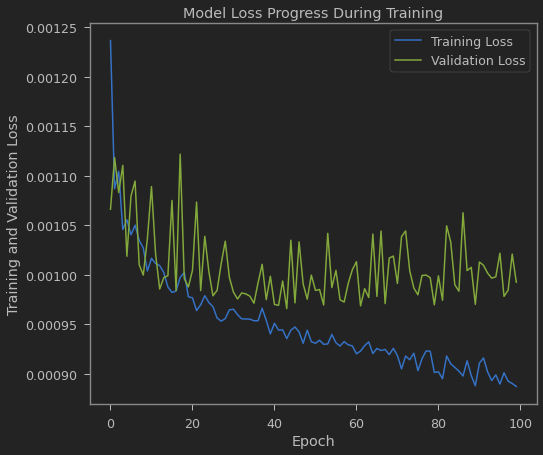

In [50]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])


In [54]:
# 'bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement'
X_test_1 = np.array([[ 4, 3, 1960, 5000, 1, 2000, 3000 ]])

scaler_1 = MinMaxScaler()
X_test_scaled_1 = scaler_1.fit_transform(X_test_1)

y_predict_1 = model.predict(X_test_scaled_1)

y_predict_1 = scaler.inverse_transform(y_predict_1)
y_predict_1

1/1 [==============================] - 0s 29ms/step


array([[278463.66]], dtype=float32)

1/1 [==============================] - 0s 119ms/step


array([[278463.66]], dtype=float32)

169/169 [==============================] - 0s 1ms/step


Text(0, 0.5, 'True Values')

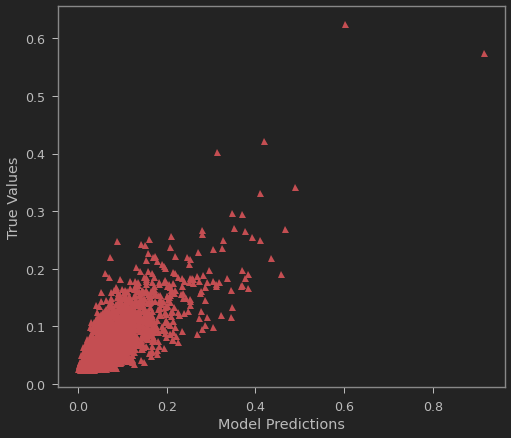

In [55]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [56]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)


(0.0, 3000000.0)

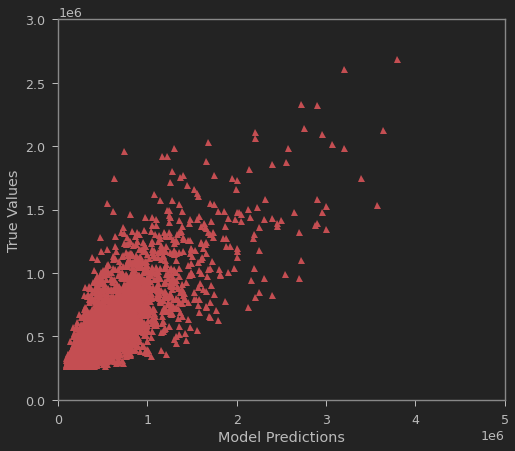

In [57]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

In [58]:
k = X_test.shape[1]
n = len(X_test)
print(n)
print(k)

5404
7


In [59]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 226586.648 
MSE = 51341509028.59982 
MAE = 151088.82733854552 
R2 = 0.6268003760138956 
Adjusted R2 = 0.6263162401043509


In [60]:
#. TRAIN AND EVALUATE A DEEP LEARNING MODEL WITH INCREASED 
# NUMBER OF FEATURES (INDEPENDANT VARIABLES)

In [62]:
selected_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 
'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

X = df[selected_features]

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [65]:
y = df['price']

In [66]:
y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [67]:
import tensorflow.keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, input_dim = 19, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [68]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [69]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, verbose = 1, validation_split = 0.2)

Epoch 1/100
260/260 [==============================] - 2s 3ms/step - loss: 0.0033 - val_loss: 0.0014
Epoch 2/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 3/100
260/260 [==============================] - 1s 2ms/step - loss: 9.2294e-04 - val_loss: 8.5673e-04
Epoch 4/100
260/260 [==============================] - 1s 2ms/step - loss: 8.1276e-04 - val_loss: 7.8825e-04
Epoch 5/100
260/260 [==============================] - 1s 3ms/step - loss: 7.5478e-04 - val_loss: 7.7365e-04
Epoch 6/100
260/260 [==============================] - 1s 3ms/step - loss: 7.2326e-04 - val_loss: 7.2469e-04
Epoch 7/100
260/260 [==============================] - 1s 3ms/step - loss: 6.9256e-04 - val_loss: 6.9392e-04
Epoch 8/100
260/260 [==============================] - 1s 2ms/step - loss: 6.6870e-04 - val_loss: 6.6204e-04
Epoch 9/100
260/260 [==============================] - 1s 2ms/step - loss: 6.4204e-04 - val_loss: 6.3417e-04
Epoch 10/100
260/260 [=============

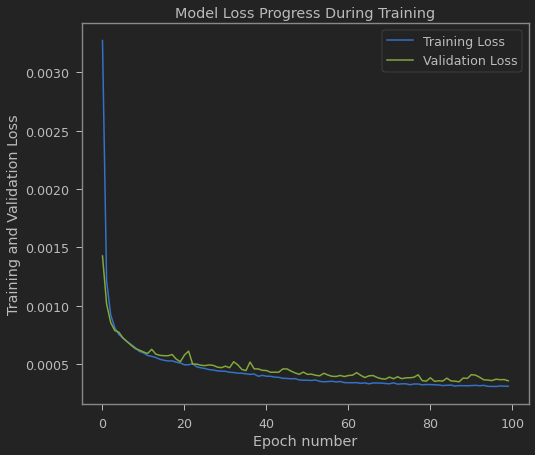

In [70]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch number')
plt.legend(['Training Loss', 'Validation Loss'])

169/169 [==============================] - 1s 4ms/step


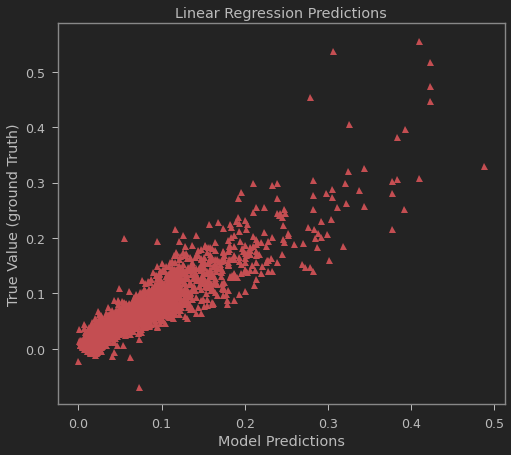

In [71]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

In [117]:
y_predict

array([[0.04315637],
       [0.04647931],
       [0.03676733],
       ...,
       [0.04483624],
       [0.04189093],
       [0.06762065]], dtype=float32)

In [104]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)


In [116]:
y_predict_orig

array([[404067.38],
       [429404.78],
       [355350.94],
       ...,
       [416876.34],
       [394418.3 ],
       [590607.44]], dtype=float32)

In [73]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 141871.441 
MSE = 20127505789.835716 
MAE = 88559.27197789687 
R2 = 0.831896267355348 
Adjusted R2 = 0.8316781935731923


In [75]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


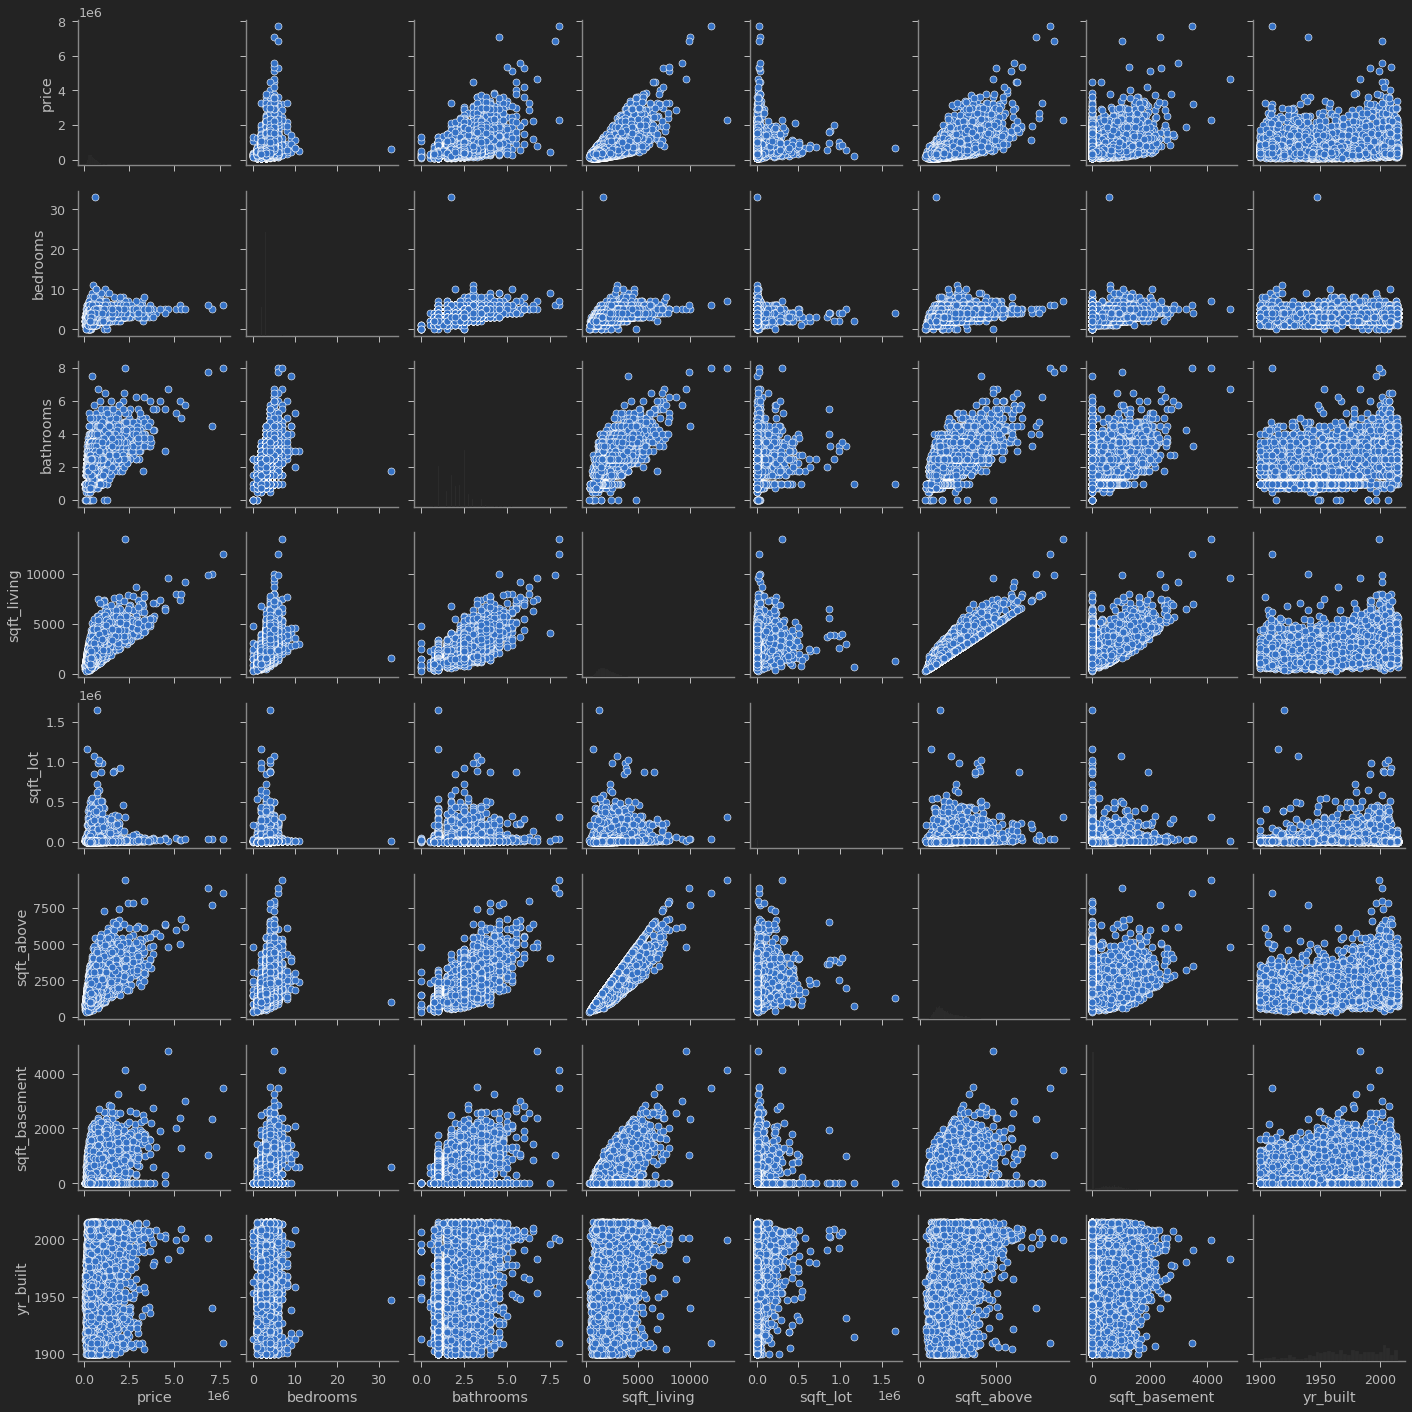

In [77]:
sns.pairplot(df_sample)